## Using Probability and Probability distribution in Spotify Data

This notebook attempts to understand the probability and distribution of various features in a music track. Listening to Rock, Jazz, Pop have become old and the current generation of consumers expect a different segmentation based on their experience, the work they do and things they like. For eg: Danceability, Liveness, Instrumentals etc helps one to decide which kind of genre to select for their situation.

Using the probability companies can understand the pattern in the behaviour of customers and use the same to suggest similar behaviours as recommendation to other customers. And with the good unuderstanding of probability concepts one can do this task easily and get more closer to the customer behaviour. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
spotify_data = pd.read_csv('c:/GL Class/Industry Session/24th-25th Sep 2022- Spotify/SpotifyAudioFeaturesApril2019.csv')

In [3]:
spotify_data.head()

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   

   speechiness    tempo  time_signature  valence  popularity  
0       0.4090  203.927               4    0.118          15  
1       0.4570  159.009               4    0.371           0  
2       0.0454  114.966               4    0.382          56  
3       0.0701  123.003               4    0.641           0  
4       0.0661  120.047               4    0.928           0

### Information about the variables

After looking at the data we can find the following information about each variable

artist_name = Composer of the song

track_id =  should be the code word for each track that spotify records

Track_name = Song names

acousticness = This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.

danceability = “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”

duration_ms = duration in milliseconds.. I am already tempted to convert them to mins but let see if this micro level detail has anything to provide

Energy = “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”

Instrumentalness = This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.

Key = The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

Liveness = Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

Loudness = The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 0db is louder than the -60
60db - max sound one hear in house 


Mode = Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.  The difference between major and minor chords and scales boils down to a difference of one essential note – the third.

The third is what gives major-sounding scales and chords their brighter, cheerier sound, and what gives minor scales and chords their darker, sadder sound.

Speechiness = 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo = The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

time_signature = An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

valence = 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity = According to Spotify, “popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.”

In [4]:
spotify_data.shape

(130663, 17)

In [5]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130663 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [6]:
print('The number of unique categories in artist name is')
print(spotify_data['artist_name'].nunique())

The number of unique categories in artist name is
34621


In [7]:
print('The number of unique categories in track id is')
print(spotify_data['track_id'].nunique())

print('The shape of the data is')
print(spotify_data.shape)

The number of unique categories in track id is
130326
The shape of the data is
(130663, 17)


In [8]:
spotify_data['artist_name'].value_counts().head(10)

Johann Sebastian Bach      3621
Wolfgang Amadeus Mozart    1755
Armin van Buuren           1124
Ludwig van Beethoven        928
Frédéric Chopin             614
Claude Debussy              451
Image Sounds                369
Waka Flocka Flame           273
Los Cadetes De Linares      266
Antonio Vivaldi             254
Name: artist_name, dtype: int64

In [9]:
dups = spotify_data.duplicated()

In [10]:
dups.value_counts()

False    130663
dtype: int64

In [11]:
spotify_data.isna().sum()

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

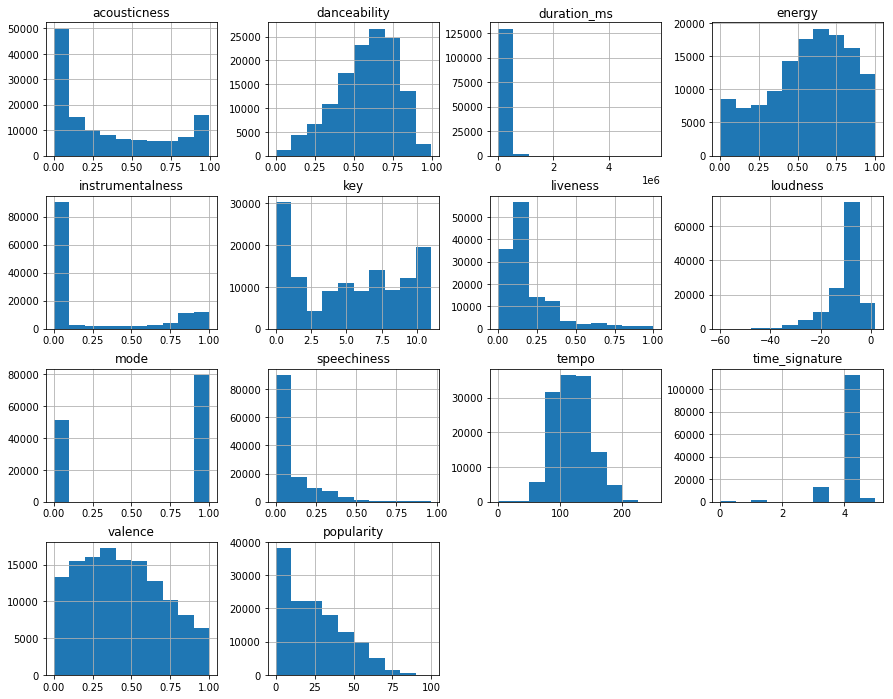

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,12
spotify_data.hist();

In [13]:
num_df = spotify_data.select_dtypes(include=['int64','float64'])

C:\Users\Anjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anjana\anaconda3\li

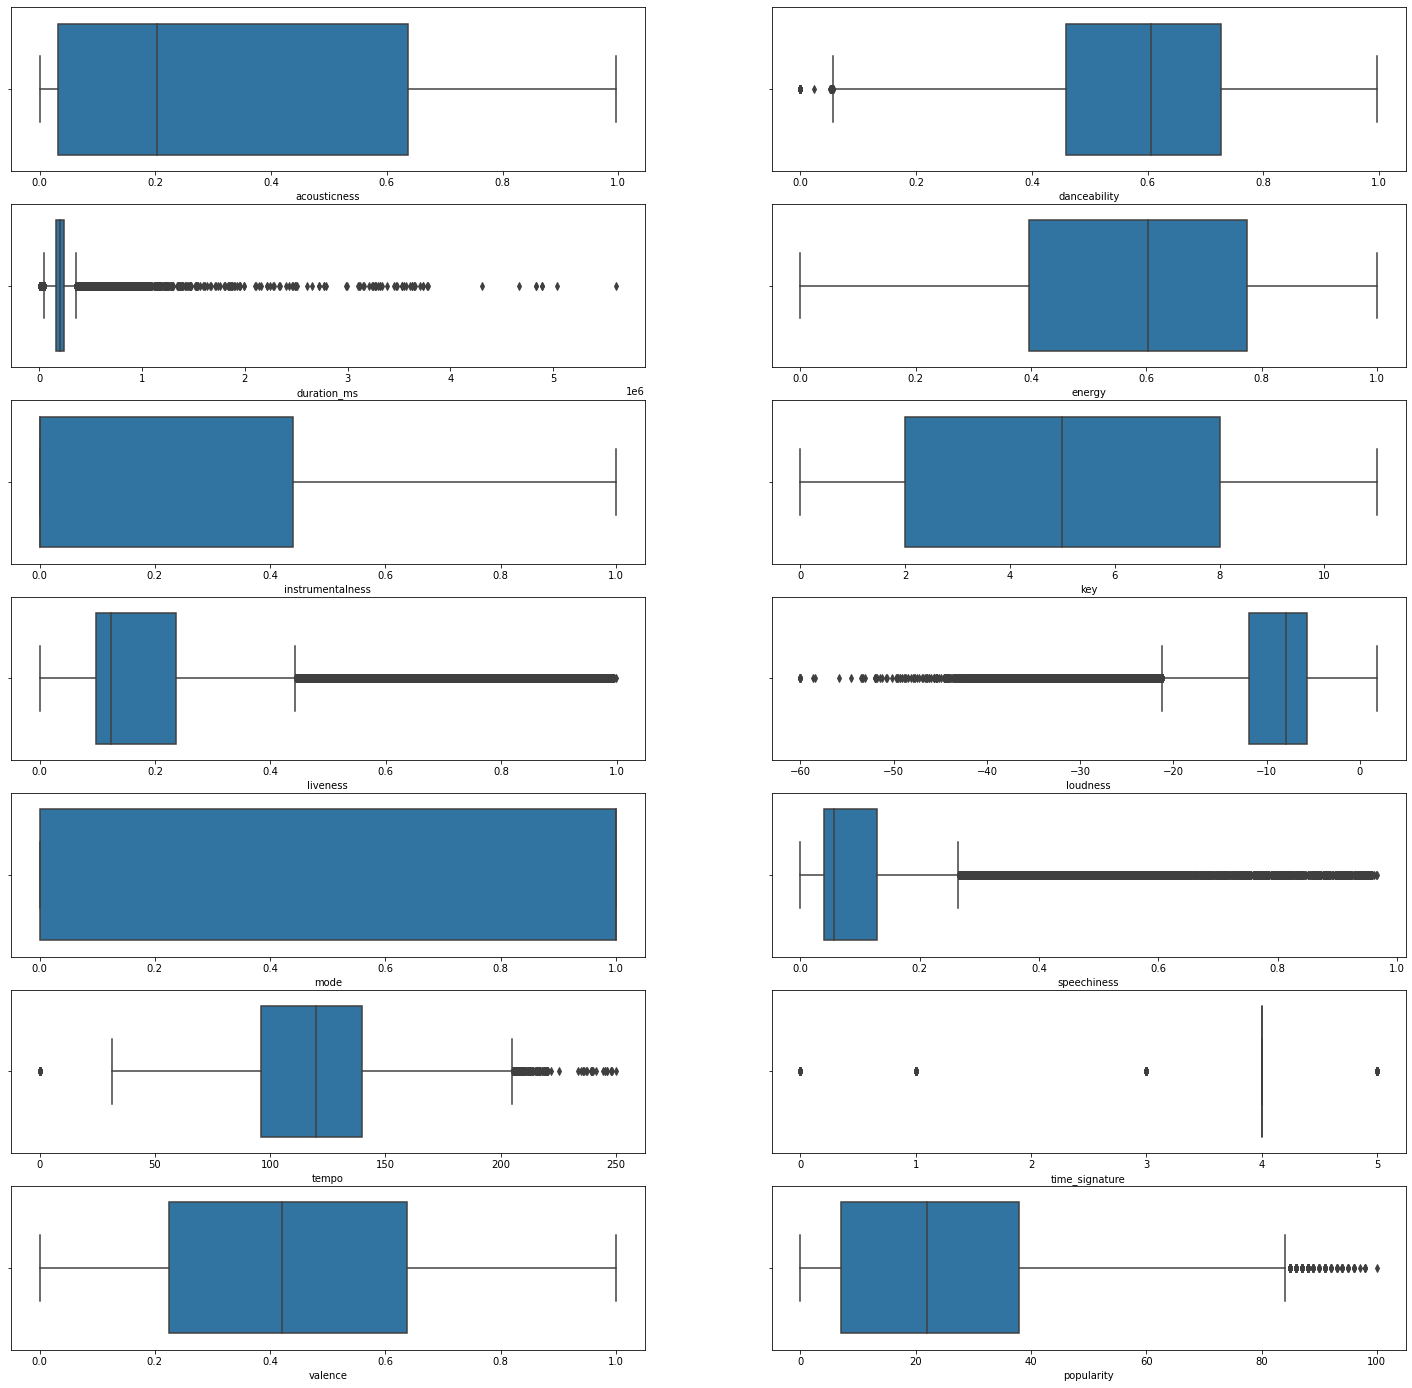

In [14]:
fig = plt.figure(figsize=(25,50))
for i in range(0,len(num_df.columns)):
    ax=fig.add_subplot(14,2,i+1)
    sns.boxplot(num_df[num_df.columns[i]])

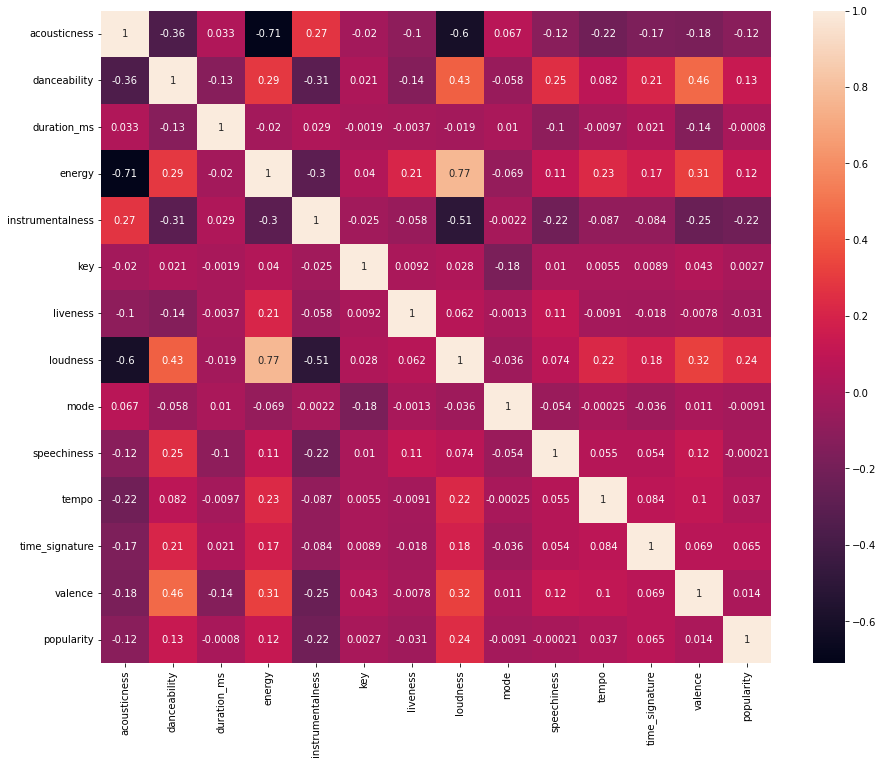

In [15]:
sns.heatmap(num_df.corr(),annot=True);

We can see,

1. Energy and Loudness are highly correlated, meanwhile the other variable associated to sound and energy like danceability is also correlated.

2. Instrumentalness & accousticness is highly negative correlated to Loudness.

Given the above relationships we can say the Loudness and Calmness are highly differentiated in the dataset, however none of the variables contribute highly for the Popularity except Loudness with to an extent (0.24) shows a positive relationship. With the magnitude and diversity of the songs even 0.24 could be considered as good relationship

So with Loudness and Calmness we can customise the user suggestions

In [16]:
corr = pd.DataFrame(num_df.corr())

corr.drop(labels='mode',axis=1,inplace=True)

In [17]:
corr = corr * corr
corr

acousticness  danceability   duration_ms    energy  \
acousticness          1.000000      0.129933  1.117310e-03  0.504195   
danceability          0.129933      1.000000  1.607346e-02  0.081908   
duration_ms           0.001117      0.016073  1.000000e+00  0.000395   
energy                0.504195      0.081908  3.954078e-04  1.000000   
instrumentalness      0.074357      0.093094  8.482302e-04  0.090786   
key                   0.000399      0.000446  3.533283e-06  0.001587   
liveness              0.010109      0.018872  1.340024e-05  0.043868   
loudness              0.364051      0.186239  3.457640e-04  0.587825   
mode                  0.004512      0.003354  1.065200e-04  0.004797   
speechiness           0.014216      0.061599  1.039487e-02  0.011041   
tempo                 0.046798      0.006690  9.326091e-05  0.052868   
time_signature        0.027330      0.042571  4.412803e-04  0.027235   
valence               0.031337      0.212952  2.011770e-02  0.099079   
popularity            0.013577      0.017183  6.416224e-07  0.015008   

                  instrumentalness       key  liveness  loudness  \
acousticness              0.074357  0.000399  0.010109  0.364051   
danceability              0.093094  0.000446  0.018872  0.186239   
duration_ms               0.000848  0.000004  0.000013  0.000346   
energy                    0.090786  0.001587  0.043868  0.587825   
instrumentalness          1.000000  0.000629  0.003409  0.258592   
key                       0.000629  1.000000  0.000084  0.000790   
liveness                  0.003409  0.000084  1.000000  0.003865   
loudness                  0.258592  0.000790  0.003865  1.000000   
mode                      0.000005  0.031060  0.000002  0.001302   
speechiness               0.047245  0.000107  0.011407  0.005544   
tempo                     0.007551  0.000030  0.000083  0.049759   
time_signature            0.007094  0.000079  0.000335  0.032285   
valence                   0.060944  0.001879  0.000061  0.102324   
popularity                0.046849  0.000007  0.000972  0.059579   

                   speechiness         tempo  time_signature   valence  \
acousticness      1.421615e-02  4.679779e-02        0.027330  0.031337   
danceability      6.159928e-02  6.689726e-03        0.042571  0.212952   
duration_ms       1.039487e-02  9.326091e-05        0.000441  0.020118   
energy            1.104130e-02  5.286775e-02        0.027235  0.099079   
instrumentalness  4.724481e-02  7.550624e-03        0.007094  0.060944   
key               1.072022e-04  2.985485e-05        0.000079  0.001879   
liveness          1.140654e-02  8.328265e-05        0.000335  0.000061   
loudness          5.543729e-03  4.975889e-02        0.032285  0.102324   
mode              2.868079e-03  6.192968e-08        0.001314  0.000123   
speechiness       1.000000e+00  3.006012e-03        0.002884  0.014775   
tempo             3.006012e-03  1.000000e+00        0.007016  0.010995   
time_signature    2.884390e-03  7.015522e-03        1.000000  0.004783   
valence           1.477497e-02  1.099498e-02        0.004783  1.000000   
popularity        4.572662e-08  1.374571e-03        0.004217  0.000205   

                    popularity  
acousticness      1.357691e-02  
danceability      1.718343e-02  
duration_ms       6.416224e-07  
energy            1.500776e-02  
instrumentalness  4.684931e-02  
key               7.190510e-06  
liveness          9.718277e-04  
loudness          5.957873e-02  
mode              8.226194e-05  
speechiness       4.572662e-08  
tempo             1.374571e-03  
time_signature    4.217129e-03  
valence           2.045663e-04  
popularity        1.000000e+00

In [18]:
relational_impact = pd.DataFrame({'Impact values' : corr.sum()}).sort_values(by='Impact values',ascending=False)
relational_impact

Impact values
loudness               2.652499
energy                 2.520593
acousticness           2.221932
danceability           1.870915
instrumentalness       1.691402
valence                1.559575
tempo                  1.186262
speechiness            1.185087
popularity             1.159054
time_signature         1.157584
liveness               1.093081
duration_ms            1.049951
key                    1.037101

Variables like Loudness, Energy, acousticness and danceability are impacting many other variables. So these four variables can become a common features/tastes of the users. We can use probability functions on these variables to create customisations

C:\Users\Anjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


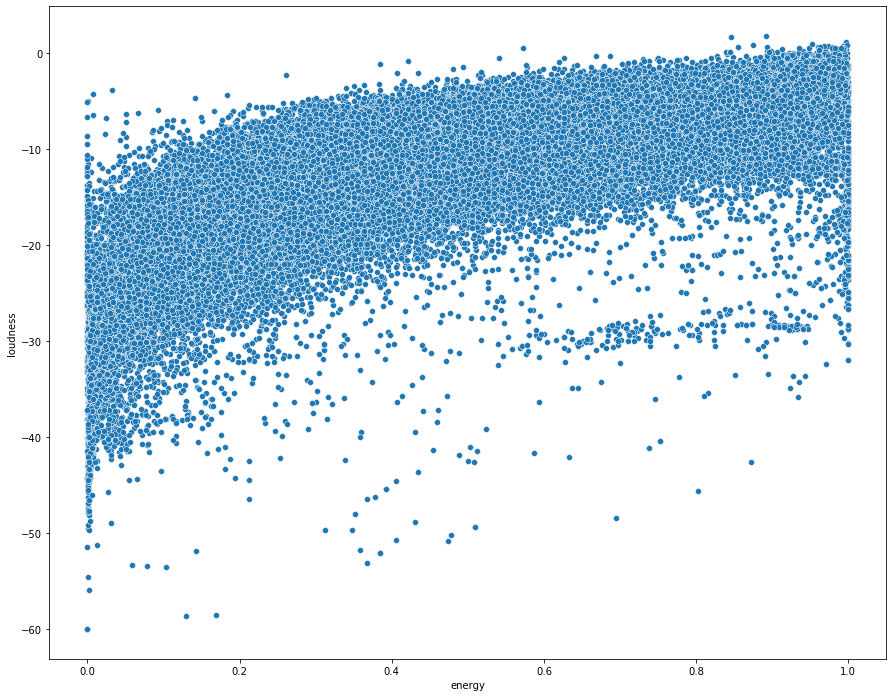

In [19]:
sns.scatterplot(spotify_data['energy'],spotify_data['loudness']);

The above scatter clearly explains that the lower negative values in loudness means higher the loudness as it will surely have positive relationsip with the energy levels

## Variable Transformations

1. Mins - Duration variable is ms let us convert them in to mins for us to make quick inferences

2. Loudness is measured in negative but we can have the same scale so that the correlations are correctly interpreted

3. As most variables are in different scales, we can bring them in to same scales. But we are working probability where knowing the real values will helps us infer the distribution well. But given the variables are not normally distributed we can opt transformation of variable to make them normal and make inferences

4. Creating the new variable called popularity category to understand the different attributes for all the popularity categories. This should gives us some direction on what is so different in popular songs.

5. Mode - variable is a categorical in nature but recorded in number let us convert the same


## New Variable - Mins

In [20]:
#creating new MINS variables and dropping the durations_ms variable
spotify_data['Mins'] = spotify_data['duration_ms']/60000
spotify_data.drop(labels='duration_ms',axis=1,inplace=True)

In [21]:
spotify_data.describe().T

count        mean        std        min        25%  \
acousticness      130663.0    0.342500   0.345641   0.000000   0.031600   
danceability      130663.0    0.581468   0.190077   0.000000   0.459000   
energy            130663.0    0.569196   0.260312   0.000000   0.396000   
instrumentalness  130663.0    0.224018   0.360328   0.000000   0.000000   
key               130663.0    5.231894   3.602701   0.000000   2.000000   
liveness          130663.0    0.194886   0.167733   0.000000   0.097500   
loudness          130663.0   -9.974006   6.544379 -60.000000 -11.898000   
mode              130663.0    0.607739   0.488256   0.000000   0.000000   
speechiness       130663.0    0.112015   0.124327   0.000000   0.038900   
tempo             130663.0  119.473353  30.159636   0.000000  96.014000   
time_signature    130663.0    3.878986   0.514403   0.000000   4.000000   
valence           130663.0    0.439630   0.259079   0.000000   0.224000   
popularity        130663.0   24.208988  19.713191   0.000000   7.000000   
Mins              130663.0    3.543885   2.052584   0.053383   2.732042   

                         50%         75%         max  
acousticness        0.203000    0.636000    0.996000  
danceability        0.605000    0.727000    0.996000  
energy              0.603000    0.775000    1.000000  
instrumentalness    0.000149    0.440000    1.000000  
key                 5.000000    8.000000   11.000000  
liveness            0.124000    0.236000    0.999000  
loudness           -7.979000   -5.684000    1.806000  
mode                1.000000    1.000000    1.000000  
speechiness         0.055900    0.129000    0.966000  
tempo             120.027000  139.642000  249.983000  
time_signature      4.000000    4.000000    5.000000  
valence             0.420000    0.638000    1.000000  
popularity         22.000000   38.000000  100.000000  
Mins                3.365017    4.017458   93.500333

In [22]:
spotify_data['mode'] = np.where(spotify_data['mode'] == 1, 'Major' , 'Minor')

In [23]:
print(spotify_data['mode'].value_counts())

spotify_data['mode'].value_counts(normalize=True)

Major    79409
Minor    51254
Name: mode, dtype: int64


Major    0.607739
Minor    0.392261
Name: mode, dtype: float64

In [24]:
spotify_data.head()

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   energy  instrumentalness  key  liveness  loudness   mode  speechiness  \
0   0.339             0.000    1    0.0812    -7.678  Major       0.4090   
1   0.557             0.000    8    0.2860    -7.259  Major       0.4570   
2   0.723             0.000    9    0.0824    -5.890  Minor       0.0454   
3   0.579             0.912    5    0.0994   -12.118  Minor       0.0701   
4   0.792             0.878    7    0.0332   -10.277  Major       0.0661   

     tempo  time_signature  valence  popularity      Mins  
0  203.927               4    0.118          15  3.972883  
1  159.009               4    0.371           0  3.580000  
2  114.966               4    0.382          56  2.315217  
3  123.003               4    0.641           0  2.089683  
4  120.047               4    0.928           0  2.066933

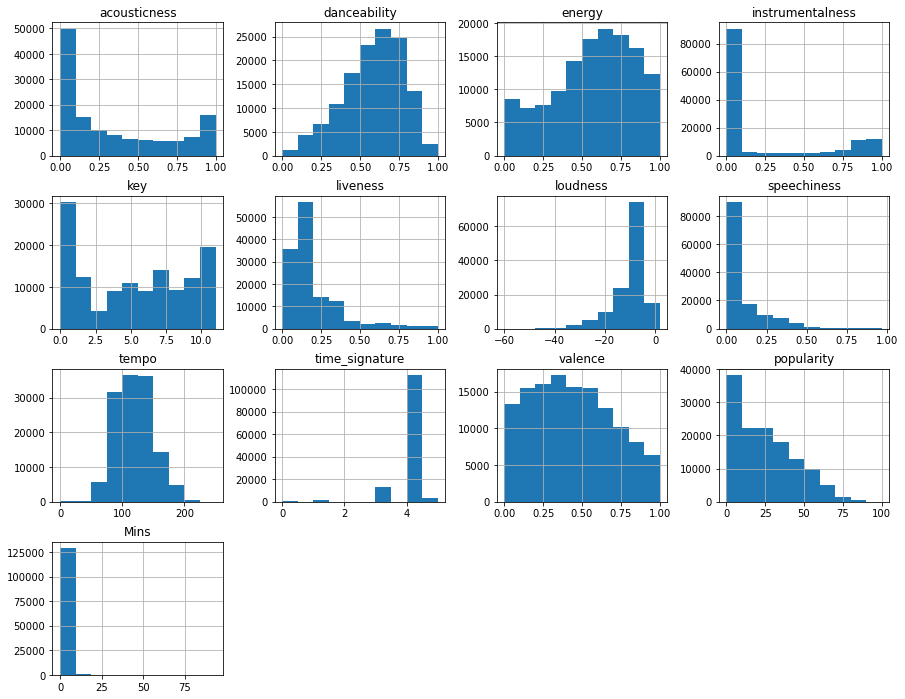

In [25]:
spotify_data.hist();

## Inference from Mode variable

In [26]:
spotify_data.groupby(spotify_data['mode']).mean()

acousticness  danceability    energy  instrumentalness       key  \
mode                                                                      
Major      0.361153      0.572625  0.554711          0.223378  4.721795   
Minor      0.313602      0.595170  0.591638          0.225010  6.022203   

       liveness   loudness  speechiness       tempo  time_signature   valence  \
mode                                                                            
Major  0.194708 -10.163707     0.106666  119.467323        3.864008  0.441937   
Minor  0.195163  -9.680097     0.120303  119.482695        3.902193  0.436057   

       popularity      Mins  
mode                         
Major   24.065345  3.560905  
Minor   24.431537  3.517517

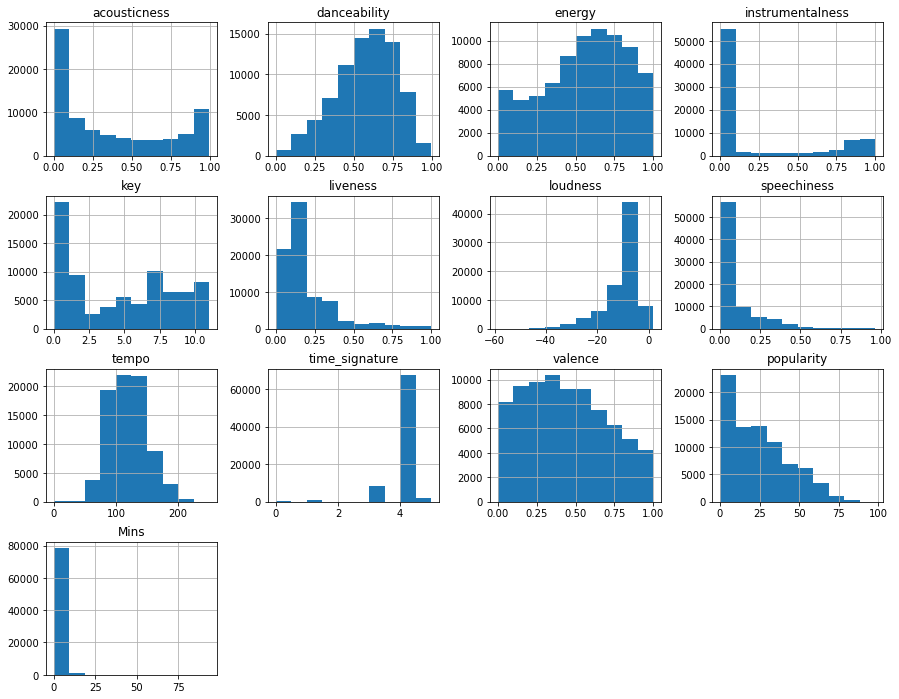

In [27]:
major_mode = spotify_data.loc[spotify_data['mode'] == 'Major']
major_mode.hist();

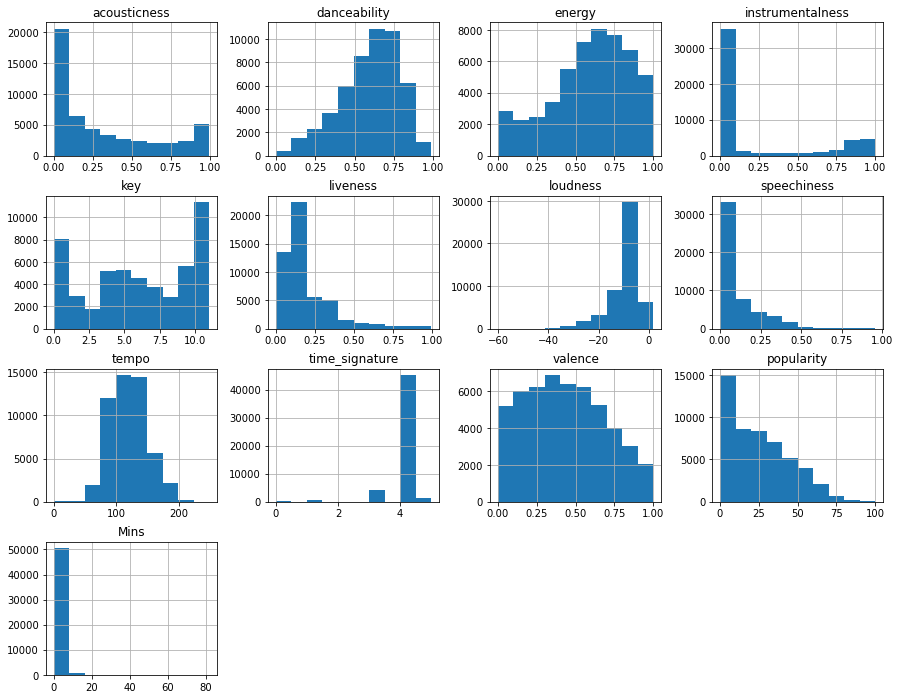

In [28]:
minor_mode = spotify_data.loc[spotify_data['mode'] == 'Minor']
minor_mode.hist();

As we can see in the averages and as well in distribution both modes does not show any great difference, given the binary nature we can reserve this for Binomial distribution

## Let us understand the differences in features for every popularity category

In [29]:
spotify_data['Popularity_Category'] = pd.cut(spotify_data['popularity'],3,labels=('Low','Medium','High'))
popularity_features = spotify_data.groupby(spotify_data['Popularity_Category']).mean()
popularity_features

acousticness  danceability    energy  instrumentalness  \
Popularity_Category                                                           
Low                      0.367096      0.564205  0.550174          0.269416   
Medium                   0.289176      0.616526  0.611737          0.126936   
High                     0.254442      0.671770  0.621649          0.045334   

                          key  liveness   loudness  speechiness       tempo  \
Popularity_Category                                                           
Low                  5.218541  0.198913 -10.917195     0.111433  118.778305   
Medium               5.264307  0.186969  -7.912183     0.112467  120.956910   
High                 5.238080  0.170684  -6.800802     0.123828  122.242490   

                     time_signature   valence  popularity      Mins  
Popularity_Category                                                  
Low                        3.859502  0.435458   13.359579  3.571662  
Medium                     3.921015  0.447542   46.878779  3.489618  
High                       3.951339  0.468186   73.300784  3.372870

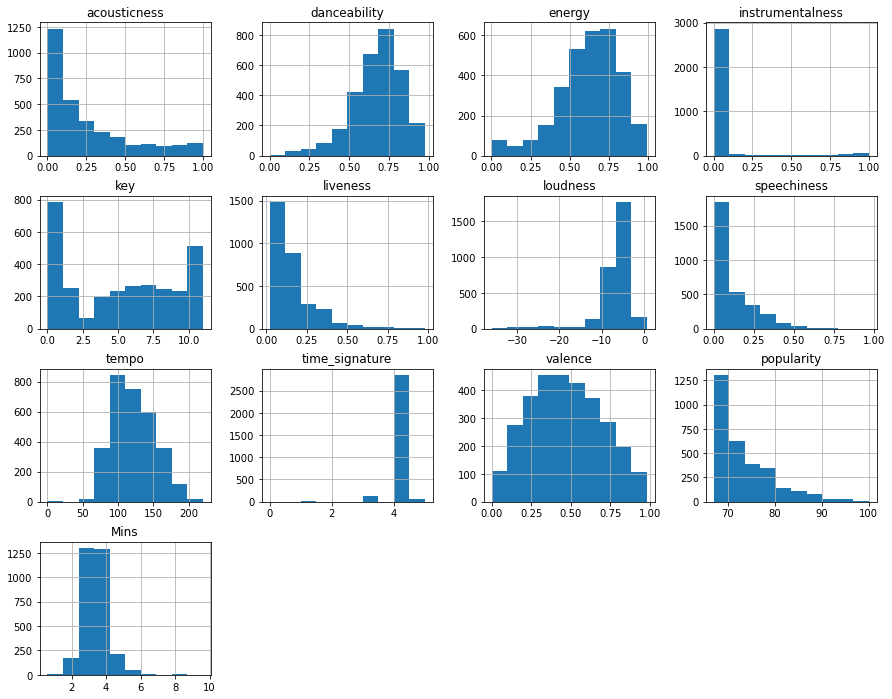

In [30]:
high_popular = spotify_data.loc[spotify_data['Popularity_Category'] == 'High']
high_popular.hist();

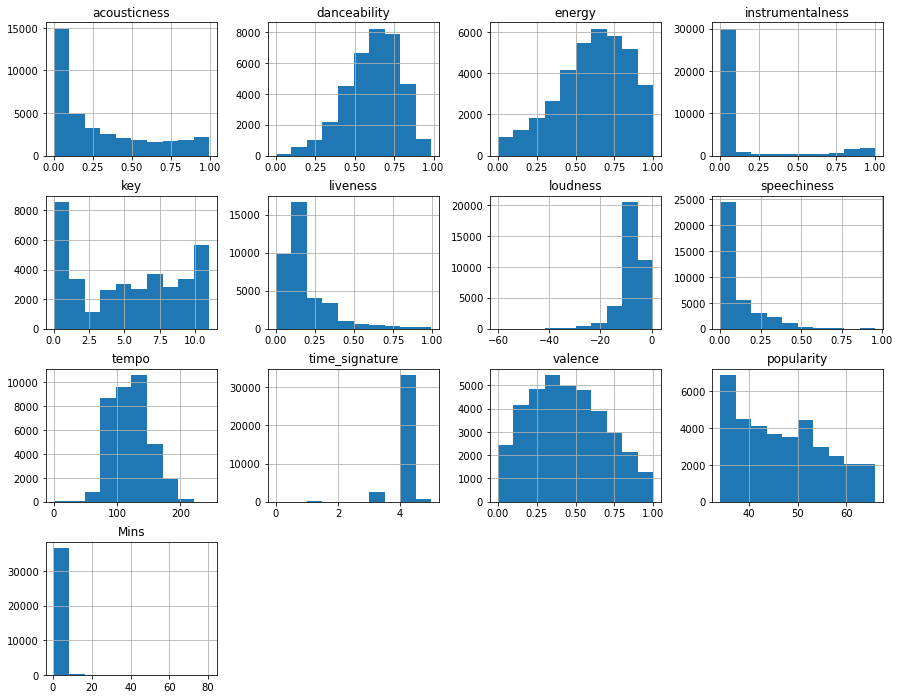

In [31]:
medium_popular = spotify_data.loc[spotify_data['Popularity_Category'] == 'Medium']
medium_popular.hist();

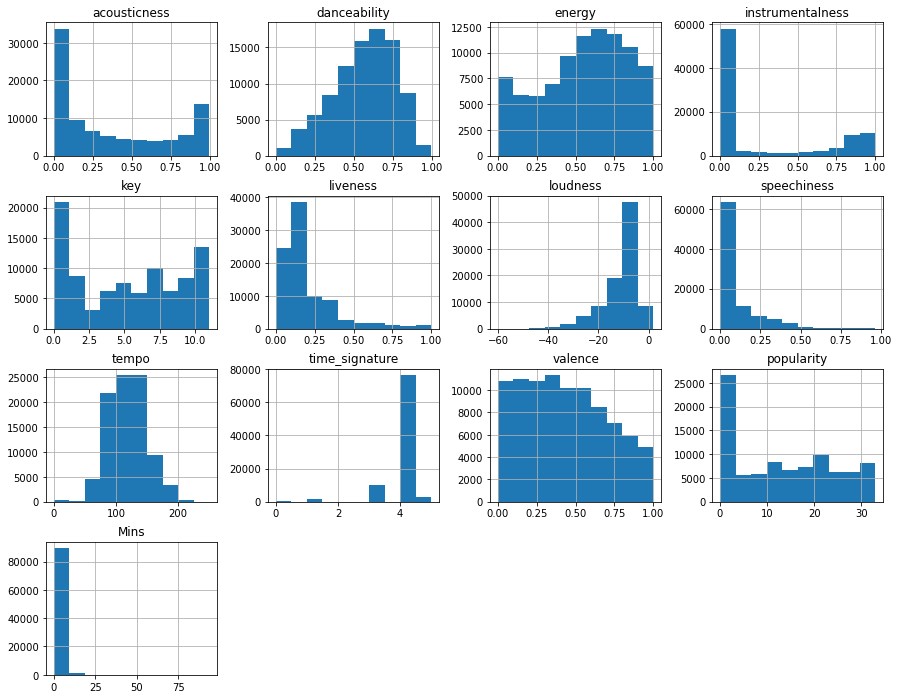

In [32]:
low_popular = spotify_data.loc[spotify_data['Popularity_Category'] == 'Low']
low_popular.hist();

In [33]:
popularity_features

acousticness  danceability    energy  instrumentalness  \
Popularity_Category                                                           
Low                      0.367096      0.564205  0.550174          0.269416   
Medium                   0.289176      0.616526  0.611737          0.126936   
High                     0.254442      0.671770  0.621649          0.045334   

                          key  liveness   loudness  speechiness       tempo  \
Popularity_Category                                                           
Low                  5.218541  0.198913 -10.917195     0.111433  118.778305   
Medium               5.264307  0.186969  -7.912183     0.112467  120.956910   
High                 5.238080  0.170684  -6.800802     0.123828  122.242490   

                     time_signature   valence  popularity      Mins  
Popularity_Category                                                  
Low                        3.859502  0.435458   13.359579  3.571662  
Medium                     3.921015  0.447542   46.878779  3.489618  
High                       3.951339  0.468186   73.300784  3.372870

## Inferences from Popularity

1. Danceability is clearly contributing to the popularity
2. Less Instrumentalness gives more popularity, this provides a likeability for Loudness, Dance and energy by wide audience
3. More notably we can see the mins are higher in terms of distributions in high popular songs. 

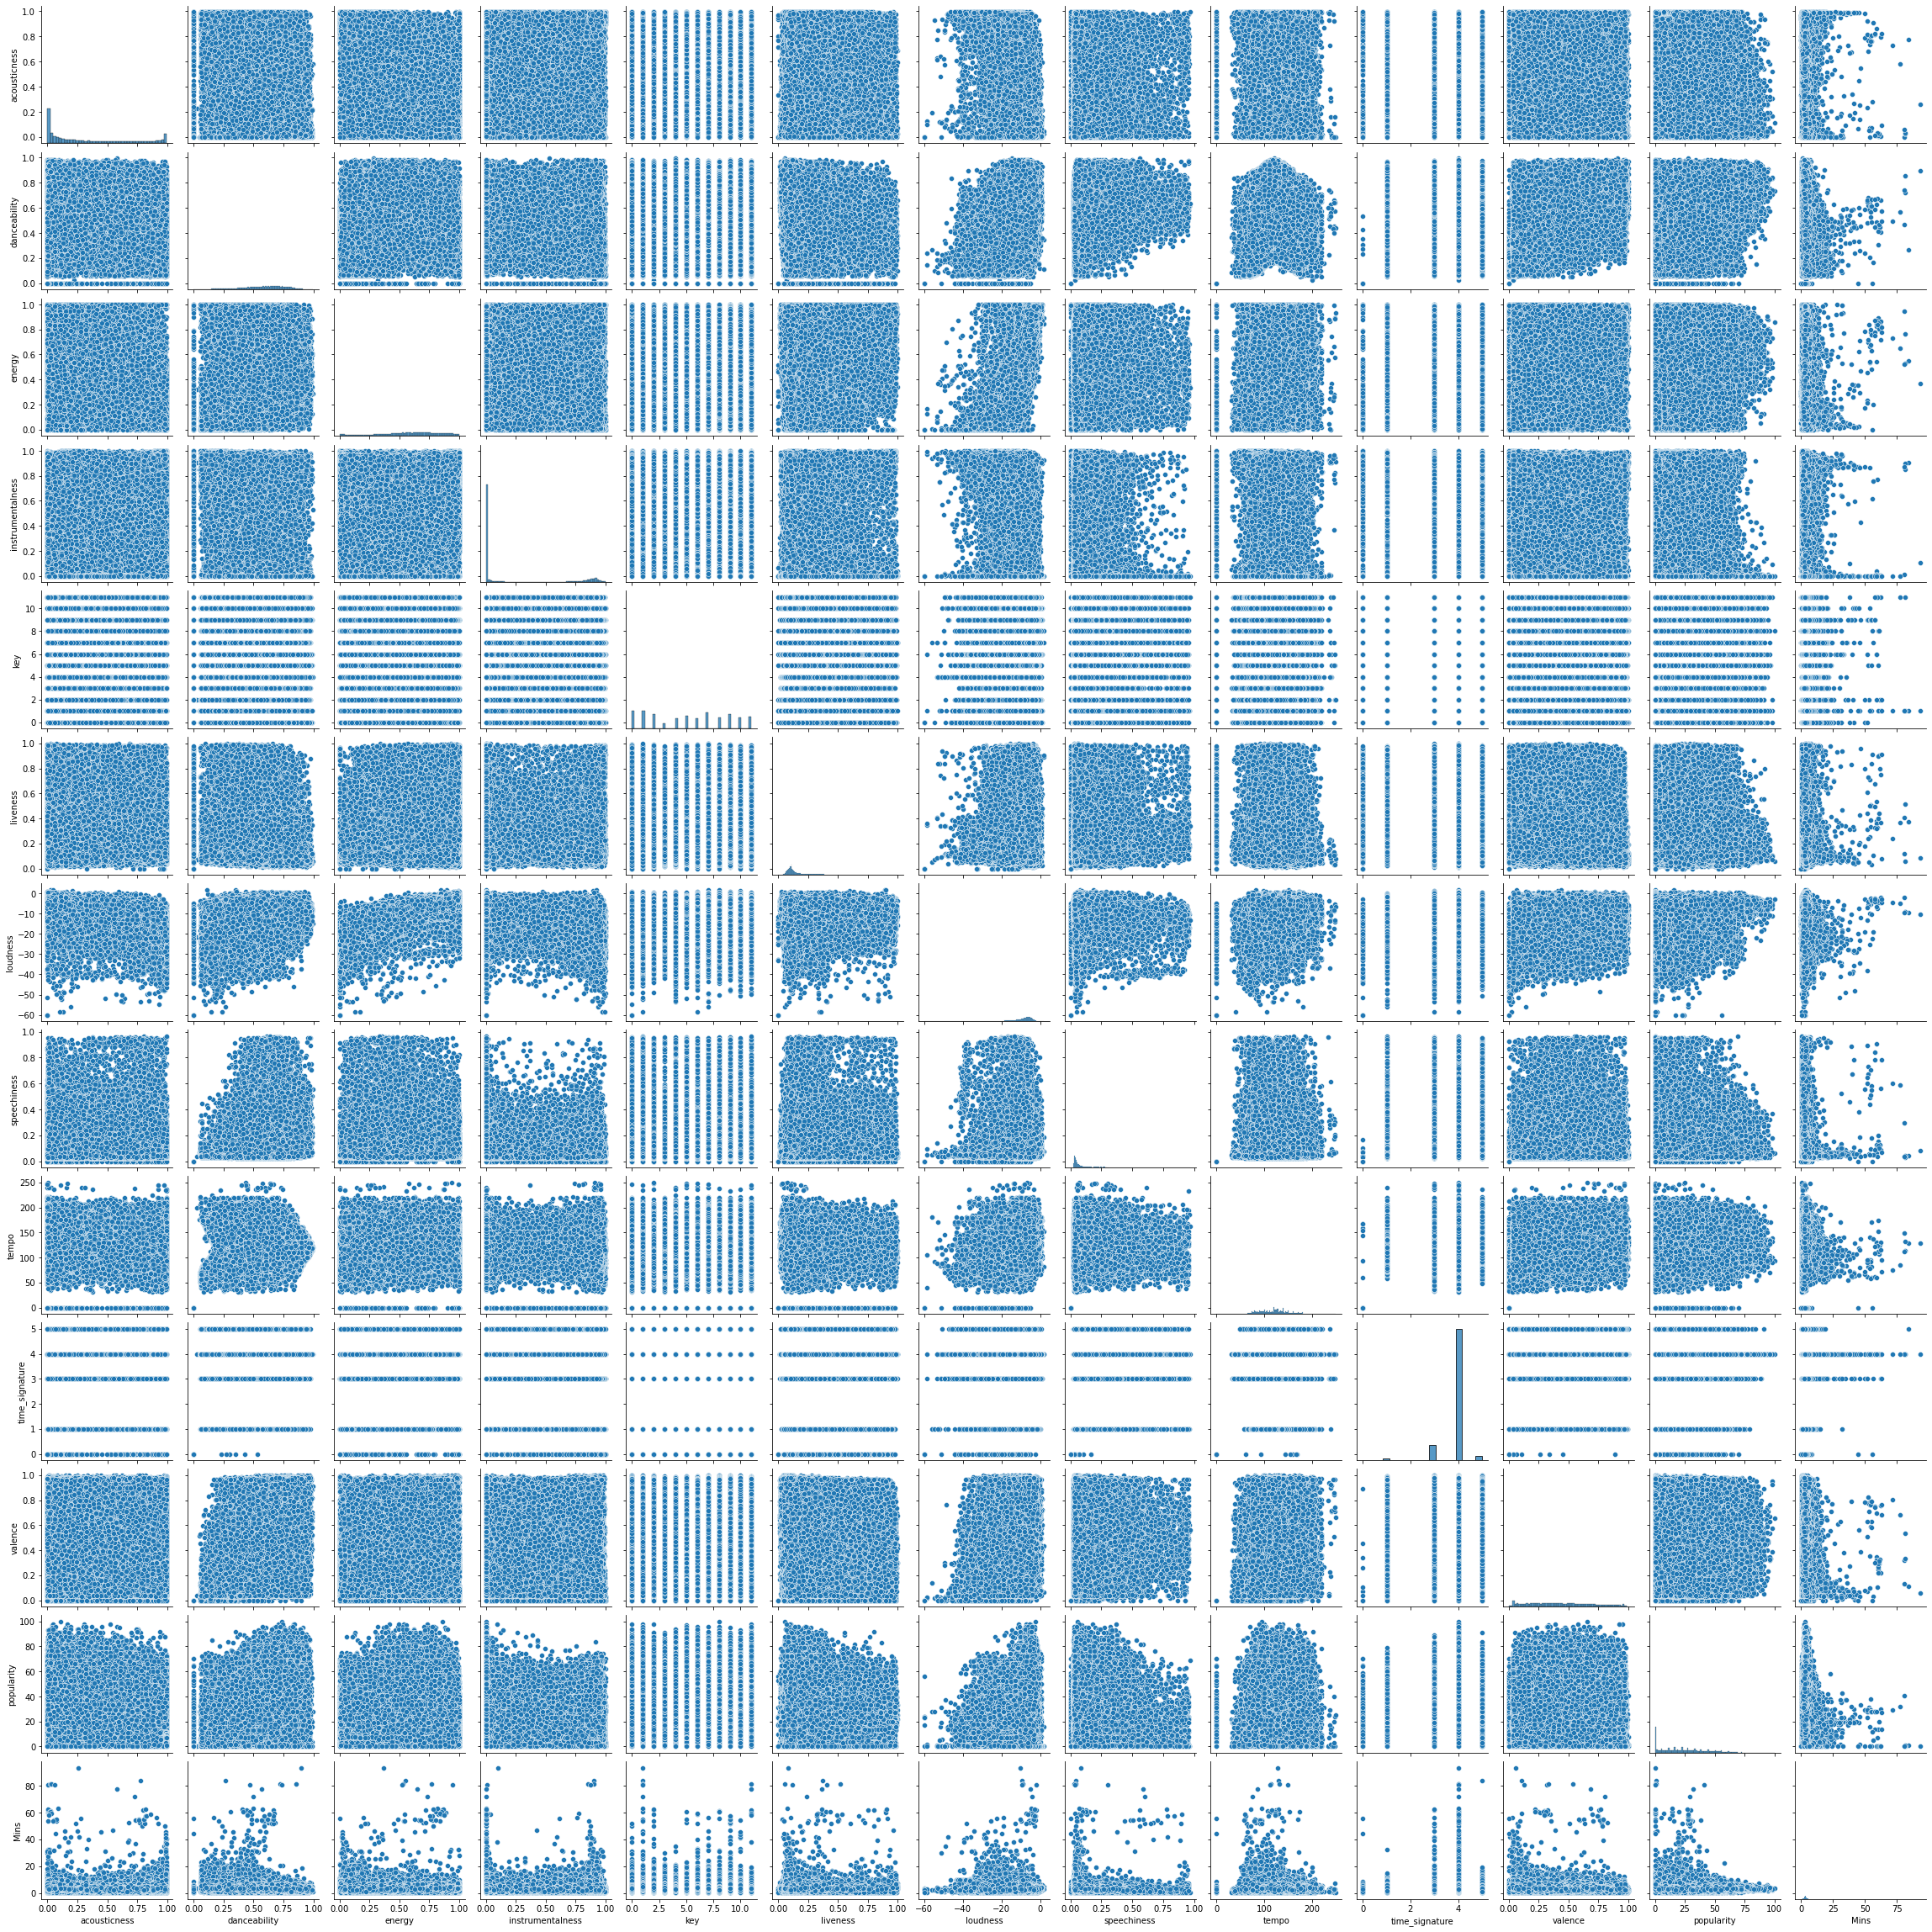

In [34]:
num_df=spotify_data.select_dtypes(include=('int64','float64'))
sns.pairplot(data = num_df)

C:\Users\Anjana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


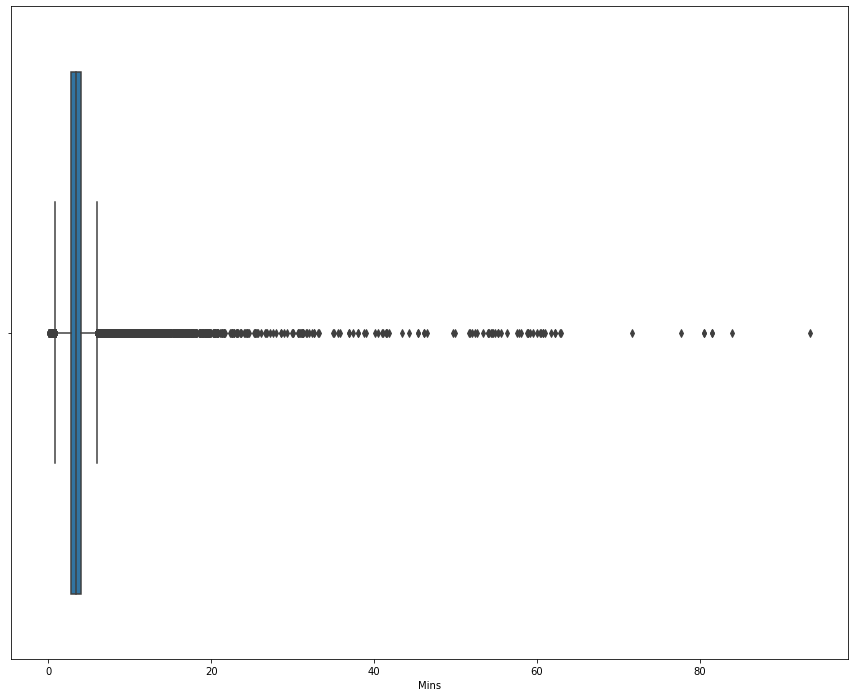

In [35]:
sns.boxplot(spotify_data['Mins']);

C:\Users\Anjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


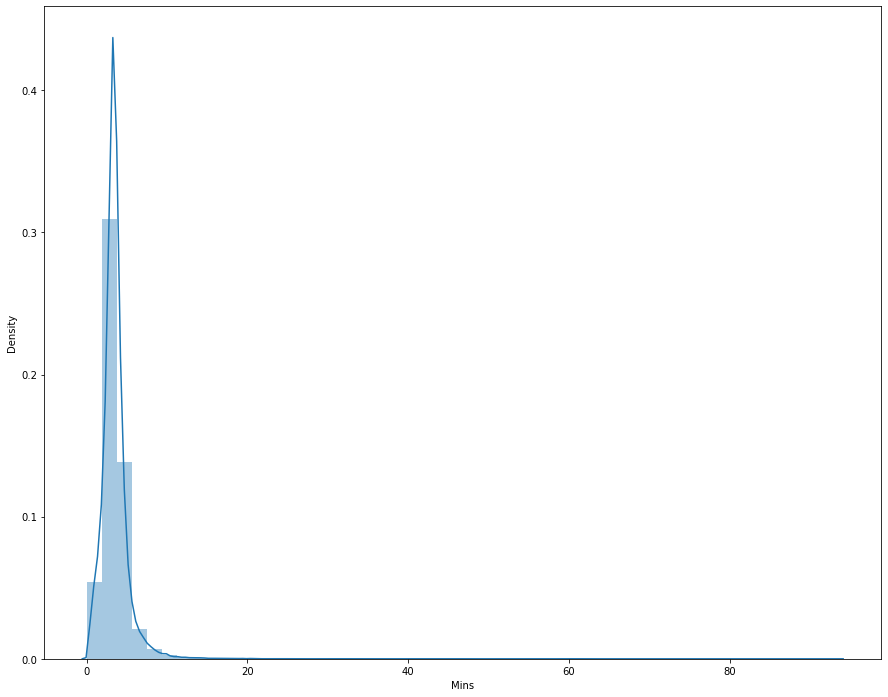

In [36]:
sns.distplot(spotify_data['Mins'],kde=True);

In [37]:
spotify_data.Mins.quantile(0.985)

8.439039999999972

In [38]:
spotify_data.Mins.quantile(0.99)

9.53939333333335

In [39]:
drop_dataset = spotify_data.loc[spotify_data['Mins'] > 8]
drop_dataset.sort_values(by='Mins',ascending=False).head(10)

artist_name                track_id  \
40548              John  3cNsPPdMfNUmMFIUImOt4P   
40545              John  2PZpYgAudxOgbHcy9RUKg2   
40546              John  21ZngbemsFIajaHjiwp4sY   
40547              John  2unsVDuPETxdQrxWavCl8q   
5427           Excision  40lBktIvVS4tBpGHm8W44C   
40549              John  6zwoWtUwuaiOFRtudN8BVr   
73443  Franco Escamilla  4FLeLBQ6mmqz3OPjmhEZd5   
83812  Franco Escamilla  5wXIui4Z17v9gqoceLBAh9   
83902          DJ Luigi  0rzz2JHEMKeoKr0rMGV1a6   
88950  Franco Escamilla  3EIz9n7Q6uxaSqjsdZTenU   

                                  track_name  acousticness  danceability  \
40548                                   Ever       0.25900         0.896   
40545                               Whatever       0.77600         0.269   
40546                                   Yeah       0.02310         0.857   
40547                                   What       0.03090         0.719   
5427                     Lost Lands 2017 Mix       0.00164         0.467   
40549                                     So       0.06140         0.739   
73443        Lo Que No Le Dirías a Tu Pareja       0.58300         0.570   
83812                  Series De La Infancia       0.72900         0.497   
83902                   Reggaeton Karmoso 12       0.09080         0.495   
88950  29 de Mayo Ganan las Chivas (En Vivo)       0.81900         0.575   

       energy  instrumentalness  key  liveness  loudness   mode  speechiness  \
40548   0.367            0.1040    1    0.0817   -10.278  Major       0.0825   
40545   0.547            0.9040    1    0.3720    -9.311  Major       0.0459   
40546   0.766            0.9020   11    0.5180    -9.150  Minor       0.0460   
40547   0.526            0.8530    1    0.0572    -9.097  Major       0.0326   
5427    0.948            0.0103    1    0.4050    -1.929  Major       0.2990   
40549   0.524            0.8750    1    0.1170    -9.408  Major       0.0348   
73443   0.651            0.0000   11    0.3660    -4.921  Minor       0.5870   
83812   0.733            0.0000    1    0.2380    -4.389  Major       0.5990   
83902   0.818            0.0000    1    0.0770    -4.630  Major       0.0720   
88950   0.780            0.0000    2    0.9080    -2.786  Major       0.7800   

         tempo  time_signature  valence  popularity       Mins  \
40548  128.045               4   0.0568           0  93.500333   
40545  128.804               5   0.1090           1  84.000800   
40546  131.988               4   0.5370           0  81.560933   
40547  112.995               4   0.3320           1  81.522217   
5427   148.898               4   0.3170          41  80.510100   
40549  112.007               4   0.1310           0  80.500183   
73443   85.699               4   0.6820          32  77.699850   
83812   75.423               4   0.8010          29  71.722767   
83902   94.463               4   0.6830          14  62.957200   
88950   72.069               3   0.7660          27  62.823317   

      Popularity_Category  
40548                 Low  
40545                 Low  
40546                 Low  
40547                 Low  
5427               Medium  
40549                 Low  
73443                 Low  
83812                 Low  
83902                 Low  
88950                 Low

In [40]:
spotify_data = pd.concat([spotify_data, drop_dataset]).drop_duplicates(keep=False)

In [41]:
spotify_data.shape

(128285, 18)

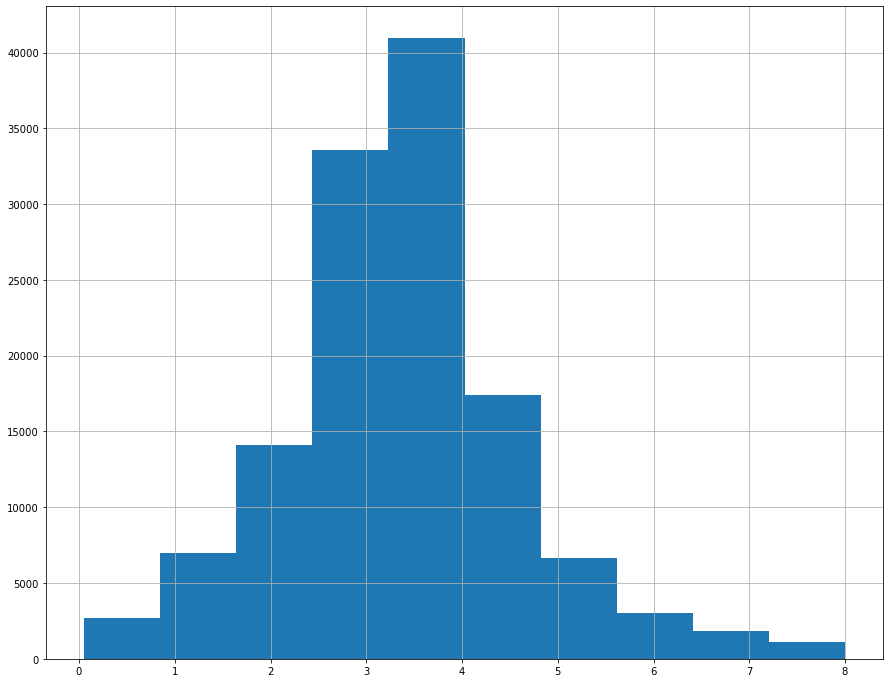

In [42]:
spotify_data['Mins'].hist();

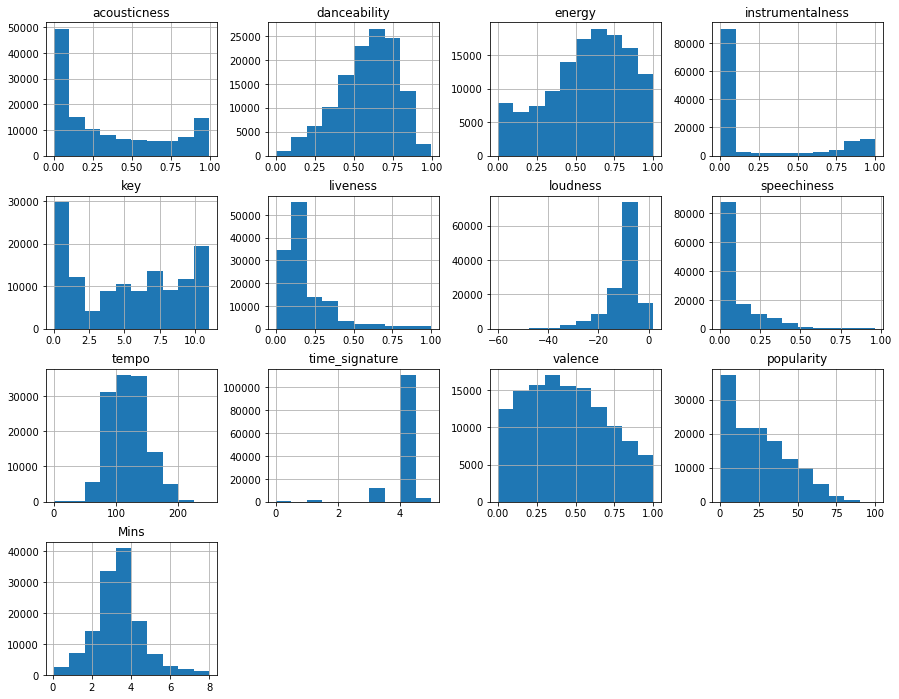

In [43]:
spotify_data.hist();

We can also see many songs are below 10 popular which are making the distribution very skewed. We can use log transformation but the skewness is large, hence it is advisable to drop the less popular songs. As our intention is suggest atleast minimal popular songs

In [44]:
spotify_data.popularity.quantile(0.50)

22.0

In [45]:
spotify_data = spotify_data.loc[spotify_data['popularity'] > 10]

In [46]:
spotify_data.shape

(89009, 18)

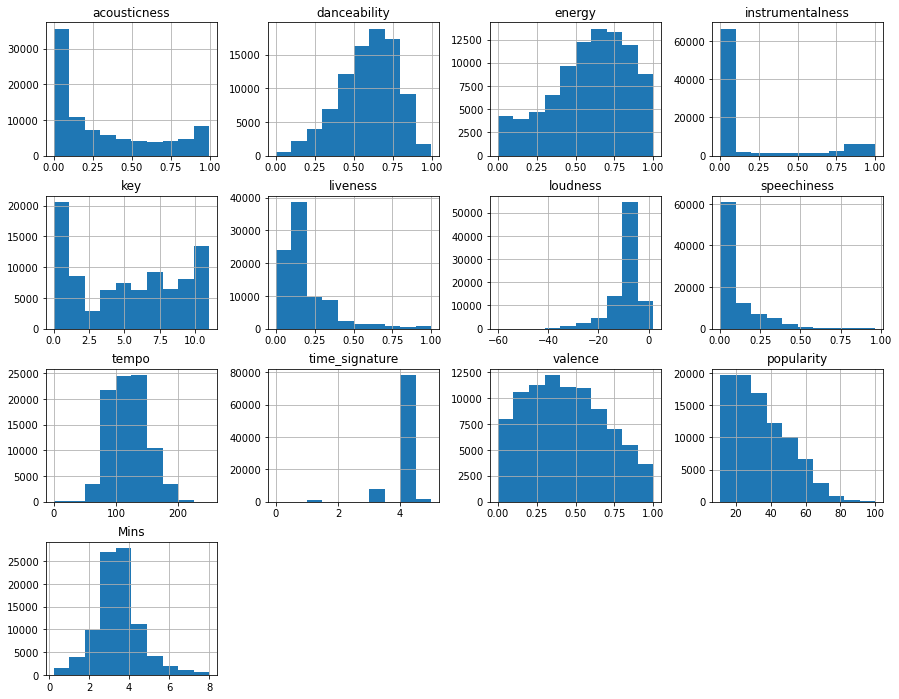

In [47]:
spotify_data.hist();

In [48]:
popularity_features = spotify_data.groupby(spotify_data['Popularity_Category']).mean()
popularity_features

acousticness  danceability    energy  instrumentalness  \
Popularity_Category                                                           
Low                      0.338385      0.566816  0.575747          0.227790   
Medium                   0.288922      0.617720  0.612134          0.125360   
High                     0.254315      0.671796  0.621692          0.045306   

                          key  liveness  loudness  speechiness       tempo  \
Popularity_Category                                                          
Low                  5.209979  0.201059 -9.987549     0.108986  119.627517   
Medium               5.264515  0.186326 -7.889393     0.112649  120.963397   
High                 5.240353  0.170562 -6.798529     0.123756  122.253048   

                     time_signature   valence  popularity      Mins  
Popularity_Category                                                  
Low                        3.879075  0.432206   21.835621  3.466375  
Medium                     3.921728  0.448741   46.909476  3.437400  
High                       3.951275  0.468037   73.304774  3.365935

In [49]:
spotify_data['Popularity_Category'].value_counts(normalize=True)

Low       0.554843
Medium    0.410801
High      0.034356
Name: Popularity_Category, dtype: float64

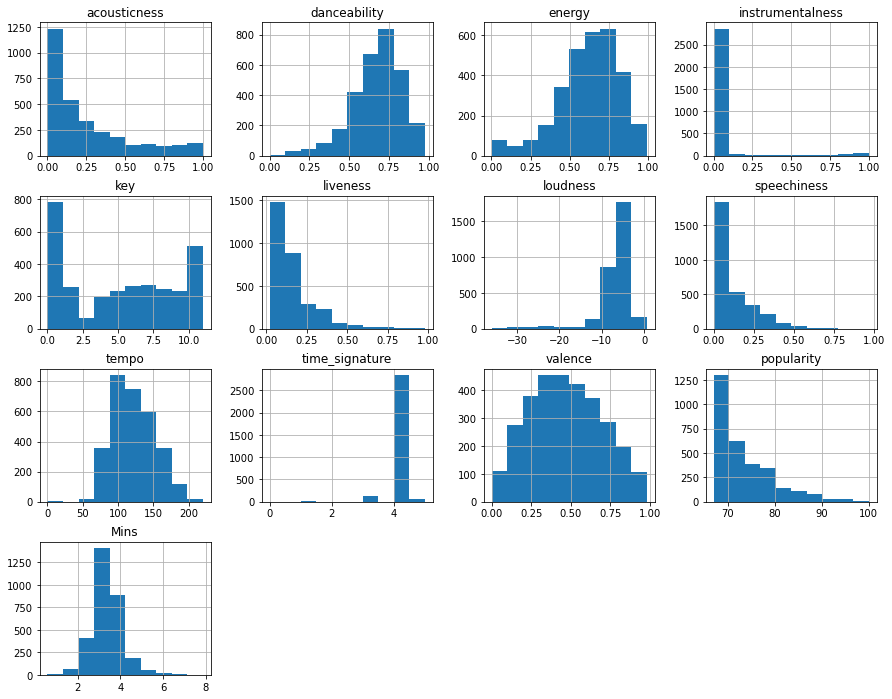

In [50]:
high_popular = spotify_data.loc[spotify_data['Popularity_Category'] == 'High']
high_popular.hist();

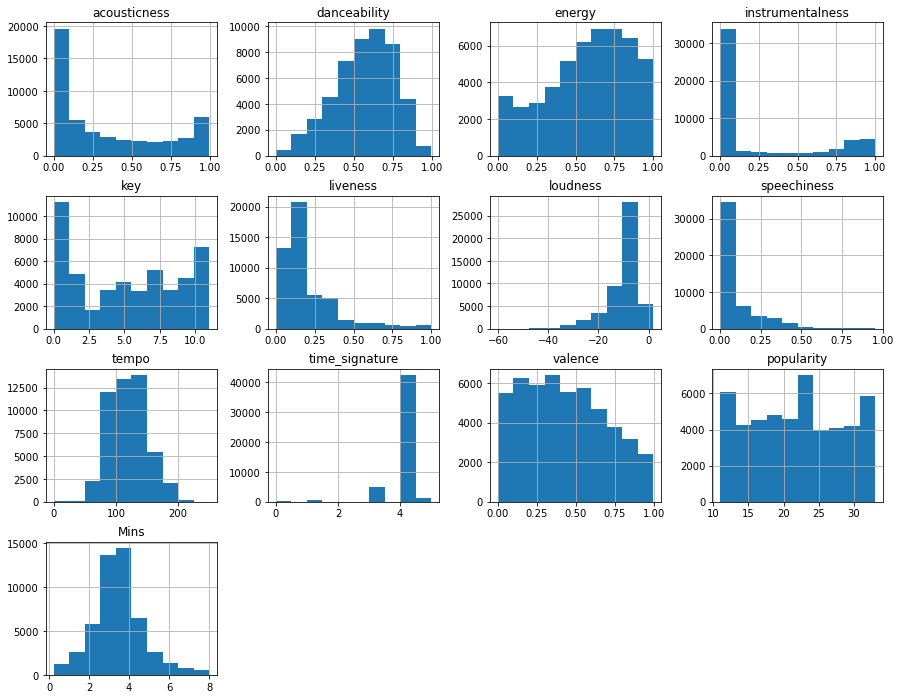

In [51]:
low_popular = spotify_data.loc[spotify_data['Popularity_Category'] == 'Low']
low_popular.hist();

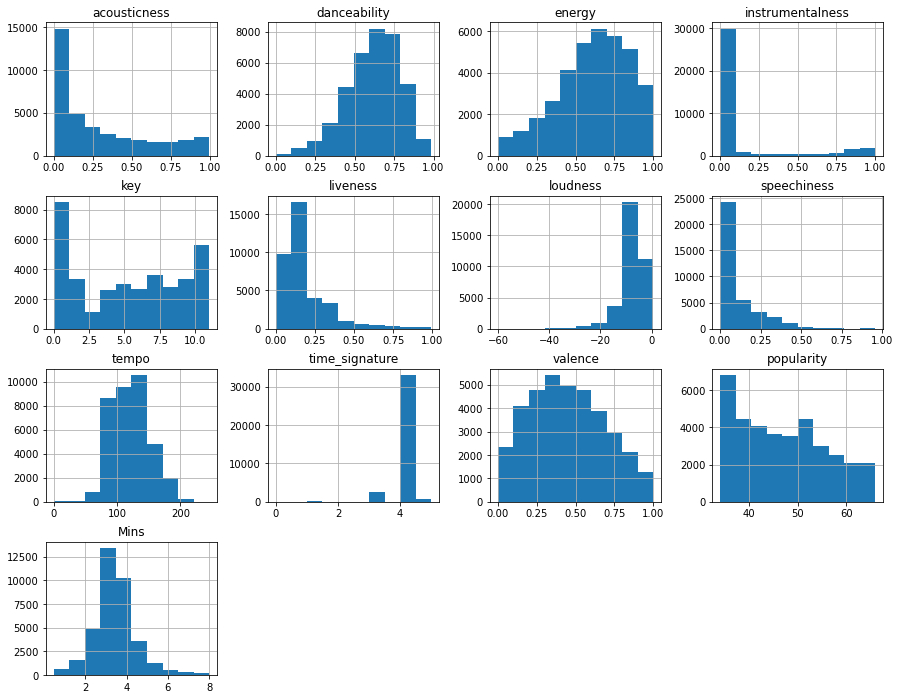

In [52]:
medium_popular = spotify_data.loc[spotify_data['Popularity_Category'] == 'Medium']
medium_popular.hist();

## Top Artist by popularity

In [53]:
artist_wise = spotify_data.groupby(spotify_data['artist_name'])
artist_wise.head()

artist_name                track_id  \
0                    YG  2RM4jf1Xa9zPgMGRDiht8O   
2                 R3HAB  6Wosx2euFPMT14UXiWudMy   
41      Mr Little Jeans  3Z78Hd9B1OndIo7XJajwYR   
42         Orjan Nilsen  16UKw34UY9w40Vc7TOkPpA   
45              Burbank  7AgDITo8BVDoh2bXj2psYA   
...                 ...                     ...   
130644        floridomi  3WNZsBN3GeBUA9xt4DQ9kD   
130650         The Lacs  3LLYOFp0hDXvyc3RX0wvgc   
130651             Ñejo  4ZtSifmVEda37YUYnnHz1y   
130656            Echos  6Tgd0DhWYzCWrwZZB6BPNw   
130659     Saint Claire  43MP9F7UzvfilSrw2SqZGJ   

                                            track_name  acousticness  \
0       Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj       0.00582   
2                                        Radio Silence       0.02500   
41                                           Forgetter       0.12500   
42                               Nothing Here But Love       0.04480   
45                                       Waiting for U       0.83200   
...                                                ...           ...   
130644                                        Lakeside       0.74900   
130650                                   Willie Nelson       0.05680   
130651                                Se Te Hizo Tarde       0.31900   
130656                                         Revival       0.66800   
130659                                  Enough for You       0.91800   

        danceability  energy  instrumentalness  key  liveness  loudness  \
0              0.743   0.339          0.000000    1    0.0812    -7.678   
2              0.603   0.723          0.000000    9    0.0824    -5.890   
41             0.821   0.512          0.007030    5    0.0879    -7.138   
42             0.574   0.881          0.000000    5    0.0756    -2.150   
45             0.699   0.309          0.171000    4    0.1160   -10.790   
...              ...     ...               ...  ...       ...       ...   
130644         0.282   0.457          0.068600   11    0.0924   -12.738   
130650         0.720   0.830          0.000000    6    0.2240    -4.356   
130651         0.698   0.801          0.000000   10    0.3160    -5.746   
130656         0.211   0.284          0.000111    1    0.1050   -10.317   
130659         0.387   0.249          0.000000    9    0.1030   -13.233   

         mode  speechiness    tempo  time_signature  valence  popularity  \
0       Major       0.4090  203.927               4   0.1180          15   
2       Minor       0.0454  114.966               4   0.3820          56   
41      Minor       0.0596  128.035               4   0.5430          28   
42      Minor       0.1660  126.131               4   0.5510          29   
45      Major       0.1590   79.991               4   0.4220          31   
...       ...          ...      ...             ...      ...         ...   
130644  Minor       0.2790  161.331               4   0.2620          49   
130650  Major       0.0858  125.988               4   0.6480          51   
130651  Minor       0.0639  169.995               4   0.9050          62   
130656  Major       0.0385   83.905               4   0.0638          51   
130659  Major       0.0437   94.039               4   0.3460          60   

            Mins Popularity_Category  
0       3.972883                 Low  
2       2.315217              Medium  
41      4.235367                 Low  
42      3.157783                 Low  
45      2.800000                 Low  
...          ...                 ...  
130644  2.225000              Medium  
130650  3.829550              Medium  
130651  5.979417              Medium  
130656  4.651167              Medium  
130659  3.243050              Medium  

[52911 rows x 18 columns]

In [54]:
artist_wise = spotify_data.groupby(spotify_data['artist_name']).mean()
artist_wise.sort_values(by='popularity',ascending=False).head(50).mean()

acousticness          0.224497
danceability          0.702754
energy                0.658901
instrumentalness      0.012526
key                   5.215086
liveness              0.169631
loudness             -5.972725
speechiness           0.108299
tempo               125.557405
time_signature        4.016291
valence               0.506032
popularity           78.868548
Mins                  3.605640
dtype: float64

Once again it is evident that the Loudness and Danceability are clear contributors for the Popularity. As we can see the top 50 popular artists' summary

## Let us create categories for key variables like Loudness, Danceablity, Energy and Valence

In [55]:
spotify_data['Loudness_category'] = pd.cut(spotify_data['loudness'], bins=3, labels =('Low_L','Medium_L','High_L'))

spotify_data['Dance_category'] = pd.cut(spotify_data['danceability'], bins=3, labels =('Low_D','Medium_D','High_D'))

spotify_data['Energy_category'] = pd.cut(spotify_data['energy'], bins=3, labels =('Low_E','Medium_E','High_E'))

spotify_data['Valence_category'] = pd.cut(spotify_data['valence'], bins=3, labels =('Low_V','Medium_V','High_V'))

In [56]:
spotify_data['Loudness_category'].value_counts()

High_L      82469
Medium_L     6357
Low_L         183
Name: Loudness_category, dtype: int64

In [57]:
spotify_data['Dance_category'].value_counts()

Medium_D    45979
High_D      34559
Low_D        8471
Name: Dance_category, dtype: int64

In [58]:
pd.crosstab(spotify_data['Dance_category'],spotify_data['Popularity_Category'], margins=True,normalize=True)

Popularity_Category       Low    Medium      High       All
Dance_category                                             
Low_D                0.069847  0.024132  0.001191  0.095170
Medium_D             0.294128  0.209058  0.013381  0.516566
High_D               0.190868  0.177611  0.019785  0.388264
All                  0.554843  0.410801  0.034356  1.000000

In [59]:
spotify_data['Loudness_category'].value_counts(normalize=True)

High_L      0.926524
Medium_L    0.071420
Low_L       0.002056
Name: Loudness_category, dtype: float64

## Grouping the data to create 2 playlists

As we have learned that the Songs with High Loudness and Danceability/Energy can carry high popularity. We can group these high loudness and danceability songs together and filter top 100 by popularity score and present to the user. 

While presenting it shuffling them will create uniqueness compared to other related playlists

In [60]:
Top100_Chart = spotify_data.loc[(spotify_data['Loudness_category'] == 'High_L') & (spotify_data['Dance_category'] == 'High_D')]
Top100_Chart.sort_values(by='popularity',ascending=False)

#Create a Shuffled Playlist and present it to the user

Top100_Chart = Top100_Chart.sample(frac=1,random_state=1).head(100)

Top100_Chart.head()

artist_name                track_id  \
123315                BROCKBEATS  3fVGdhLSoJSZzrP2EISemI   
123488  Unknown Mortal Orchestra  6VPvz8SZWRFEoawyUTvQTt   
127462                   Demotus  3iVG5lHYqkehXTTDa4FTlQ   
38567               Knoc-Turn'al  1Uj9Kl40J3iGpW640XGi7T   
9592               Oliver Hazard  6FMU2F12NJI4MIsfU1J7mk   

                          track_name  acousticness  danceability  energy  \
123315                    get warmer        0.8760         0.788   0.438   
123488  Everyone Acts Crazy Nowadays        0.4730         0.816   0.755   
127462                      Sunshine        0.0249         0.687   0.460   
38567                  Mind Yourself        0.0473         0.861   0.913   
9592                      Hey Louise        0.6400         0.727   0.398   

        instrumentalness  key  liveness  loudness  ...    tempo  \
123315          0.893000    9     0.186   -12.123  ...   96.635   
123488          0.000003    8     0.178    -4.942  ...  120.008   
127462          0.000672    1     0.140    -7.476  ...   76.512   
38567           0.000000   11     0.208    -4.203  ...   91.981   
9592            0.001140    6     0.124    -8.498  ...   75.087   

        time_signature  valence  popularity      Mins  Popularity_Category  \
123315               4    0.555          58  3.133333               Medium   
123488               4    0.735          56  4.249550               Medium   
127462               4    0.334          23  2.947917                  Low   
38567                4    0.862          25  3.360667                  Low   
9592                 4    0.310          32  2.962883                  Low   

        Loudness_category Dance_category Energy_category Valence_category  
123315             High_L         High_D        Medium_E         Medium_V  
123488             High_L         High_D          High_E           High_V  
127462             High_L         High_D        Medium_E         Medium_V  
38567              High_L         High_D          High_E           High_V  
9592               High_L         High_D        Medium_E            Low_V  

[5 rows x 22 columns]

In [61]:
Top25_rarely_heard = spotify_data.loc[(spotify_data['Loudness_category'] == 'High_L') & (spotify_data['Dance_category'] == 'High_D') & (spotify_data['popularity'] <= 30)]
Top25_rarely_heard.sort_values(by='popularity',ascending=True).head(25)

Top25_rarely_heard = Top25_rarely_heard.sample(frac=1,random_state=20).head(25)
Top25_rarely_heard

artist_name                track_id  \
35218                       Siggno  3dC7bWdZ8xiTn2uuU01DjZ   
38208                  Matt Corman  0dBwajeSPwj6ieeH6Pch2x   
1990                   El Komander  79ulIkQ9loTDiZLhR6iohh   
90011                     RICEWINE  5hctzrmxDxlRGw8f52LoCh   
65652                  Luis Vargas  1kTS3HO24w4bm7G0j8yB6a   
19071                       Cheekz  24FMjFkAA504YKbJO8A2zd   
53211                     Mike Wit  6EIOSGdfVFMeKxr3s831d6   
32660                 Scotty Valid  5aBhULsMHvDKoOAUBzpNoJ   
47514                 Henry Mendez  41aGmYSYLlqUlsiy7a2Sa0   
57533                      DJ Friz  0QN4l8QKDSiMqcTewnsVgk   
42838                TROSSTHEGIANT  15Mv8XBMZkSUgbE98Vz7Nb   
80093                Ugly Duckling  5A5OFI4D4TkkEXJj58rXcP   
35557  Los Herederos De Nuevo León  2qBonlB2aWbzXUcyFXzZ8J   
33717                Snail's House  7Henmd5KMPWO3cLfYTdcXd   
55055                 Flunky Junky  6oR4H8JmoeiWBTwd2MTtf3   
22424               Miles Sullivan  2bXm1pr9SvH71ZH1SoGmj3   
19647                    OMB Peezy  28IKMZQXTFZ2vkqO8GQxuk   
32850                    Jindoggae  7HQrggilQLfnHFpTRZ3vlr   
18335             La Zenda Norteña  5UWZvrVnHvjAHIsGb8903e   
13519                   TOKiMONSTA  7139qtIrB6RIptbJ4mYwYL   
42168                 Trevor Moore  5lXal6672HnUIGIJ5hbrcj   
68824          Andrew Lloyd Webber  7rMmO8FnNdlAHeCqImZjy2   
39129                DrewsThatDude  1Xq6d8Qq1svu4wOfCLMuJb   
42392             The Philharmonik  4Vh97pwj2onkTPsRLbTMuL   
83265                 Triple Thr33  2fz6aglY1L7ktNhE9n0rRI   

                                              track_name  acousticness  \
35218                                      Se Desesperan      0.369000   
38208                                    Through My Mind      0.000109   
1990                               Tengo Ganas (En Vivo)      0.096600   
90011                                              Intro      0.894000   
65652                         La Mujer Que Yo Más Quiero      0.071900   
19071                                          TOUCHDOWN      0.001780   
53211                                            Seasons      0.338000   
32660                                             See Me      0.580000   
47514                                            Tú y Yo      0.117000   
57533      Dive (feat. MRSHLL, Megan Lee) [English Ver.]      0.315000   
42838                                               Fyi.      0.039700   
80093                                 It Want To Believe      0.025800   
35557                              Paloma Piquito de Oro      0.235000   
33717                                              Hello      0.006520   
55055                                       Vacation EDM      0.039400   
22424                                         Drunk Dial      0.059700   
19647                                        Better Dayz      0.221000   
32850                                        XXXL FUTURE      0.368000   
18335                        En Silencio (Version Banda)      0.129000   
13519  I Wish I Could (feat. Selah Sue) [Sofi Tukker ...      0.212000   
42168                                             My PSA      0.068400   
68824                Cold - From "Whistle Down The Wind"      0.290000   
39129                                              Kings      0.010300   
42392                                             Colors      0.442000   
83265                                 Ye of Little Faith      0.527000   

       danceability  energy  instrumentalness  key  liveness  loudness  ...  \
35218         0.679   0.836          0.000012    7    0.2750    -6.412  ...   
38208         0.687   0.524          0.000181    0    0.2510    -9.504  ...   
1990          0.753   0.447          0.000024    0    0.0985    -7.385  ...   
90011         0.681   0.368          0.933000    5    0.1010   -11.777  ...   
65652         0.911   0.647          0.000031    9    0.0569    -6.682  ...   
19071      

## Bayes Theorem

### Question 1: What is the probability that the song will be popular if it is having high Valence?


In [62]:
spotify_data['Popularity_Bayes'] = pd.cut(spotify_data['popularity'], 2, labels=('Low','High'))
spotify_data['Valence_Bayes'] = pd.cut(spotify_data['valence'],2, labels = ('Low','High'))
spotify_data['Dance_Bayes'] =pd.cut(spotify_data['danceability'],2, labels = ('Low','High'))
spotify_data['Loudness_Bayes'] =pd.cut(spotify_data['loudness'],2, labels = ('Low','High'))

In [63]:
crosstab_1 = pd.crosstab(spotify_data['Popularity_Bayes'],spotify_data['Valence_Bayes'],margins=True)
crosstab_1

Valence_Bayes       Low   High    All
Popularity_Bayes                     
Low               47025  31370  78395
High               6139   4475  10614
All               53164  35845  89009

BAYES FORMULA: 

P(High Popular | High Valence) = P(High Valence | High popularity)* P(High Popularity)  / P(High Valence)


In [64]:
Prob_of_HighValence = (35845/89009)
Prob_of_HighValence_Given_Highpopularity = (4475/10614)
Prob_of_HighPopularity = (10614/89009)


Answer =(Prob_of_HighValence_Given_Highpopularity * Prob_of_HighPopularity) / Prob_of_HighValence
Answer

0.12484307434788673

The probability of a song becoming popular with high Valence is just as low as 12%. Lyricists need to note this huge fall

In [65]:
crosstab_2 = pd.crosstab(spotify_data['Popularity_Bayes'],spotify_data['Dance_Bayes'],margins=True)
crosstab_2

Dance_Bayes         Low   High    All
Popularity_Bayes                     
Low               23925  54470  78395
High               1838   8776  10614
All               25763  63246  89009

P(High Popular | High Dance) = P(High Dance | High popularity)* P(High Popularity)  / P(High Dance)

In [66]:
Prob_of_Highdance = (63246/89009)
Prob_of_Highdance_Given_Highpopularity = (8776/10614)
Prob_of_HighPopularity = (10614/89009)


Answer =(Prob_of_Highdance_Given_Highpopularity * Prob_of_HighPopularity) / Prob_of_Highdance
print('The probability of song becoming popular with high danceability is ', Answer *100)

The probability of song becoming popular with high danceability is  13.875976346330201


## Naive Bayes Model for predicting Popularity using Loudness, Valence & Danceability

In [67]:
naive_bayes = spotify_data[['Dance_Bayes','Valence_Bayes','Popularity_Bayes']]
naive_bayes.head()

Dance_Bayes Valence_Bayes Popularity_Bayes
0         High           Low              Low
2         High           Low             High
41        High          High              Low
42        High          High              Low
45        High           Low              Low

## Label Encoding

In [68]:
spotify_data['Dance_Bayes'].value_counts()

High    63246
Low     25763
Name: Dance_Bayes, dtype: int64

In [69]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
label_encode = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Dance_encoded =label_encode.fit_transform(spotify_data['Dance_Bayes'])
print ('The Encoded numbers are 0 for High & 1 for low : ', Dance_encoded)


dummy = pd.DataFrame(Dance_encoded)
dummy[0].value_counts()

The Encoded numbers are 0 for High & 1 for low :  [0 0 0 ... 0 0 0]


0    63246
1    25763
Name: 0, dtype: int64

In [70]:
Valence_encoded =label_encode.fit_transform(spotify_data['Valence_Bayes'])

print('The encoded numbers are 0 for high & 1 for low' , Valence_encoded)

dummy = pd.DataFrame(Valence_encoded)
dummy[0].value_counts()

The encoded numbers are 0 for high & 1 for low [1 1 0 ... 0 1 0]


1    53164
0    35845
Name: 0, dtype: int64

In [71]:
Popularity_encoded = label_encode.fit_transform(spotify_data['Popularity_Bayes'])

print('The encoded numbers are 0 for high & 1 for low' , Popularity_encoded)

dummy = pd.DataFrame(Popularity_encoded)
dummy[0].value_counts()

The encoded numbers are 0 for high & 1 for low [1 0 1 ... 1 1 1]


1    78395
0    10614
Name: 0, dtype: int64

In [72]:
Dance_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
features=tuple(zip(Dance_encoded,Valence_encoded))
print(features)

((0, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0), (0, 1), (0, 0), (0, 1), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 1), (0, 1), (0, 0), (0, 1), (1, 1), (1, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 1), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0),

In [74]:
Popularity_encoded

label = tuple(Popularity_encoded)

In [75]:
print(label)

(1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

In [76]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,1]]) 
print ("Predicted Value:", predicted)


Predicted Value: [1]


With High Danceability and High Valence we may not get high Popularity.

Note: We have roughly split the data by 50% for exercise purpose, if we carefully split the data by 2 or more category we achieve much better results. Splitting the train and test dataset and checking for accuracy will give exact results of the Model.

## Bionomial Distribution

C:\Users\Anjana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

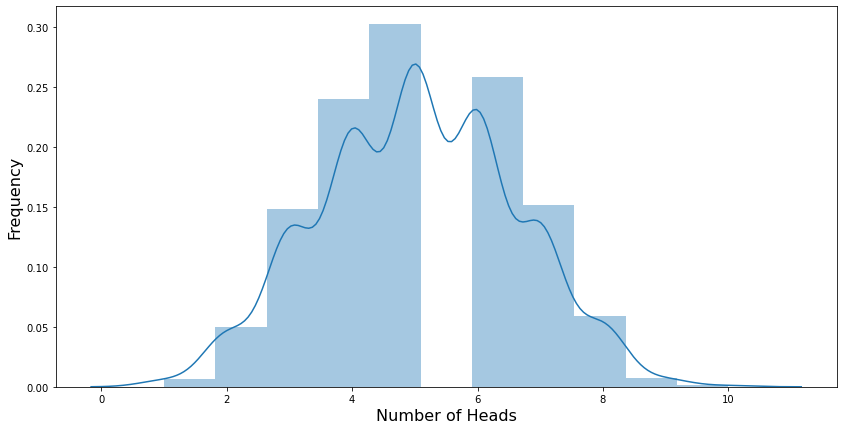

In [77]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Input variables
# Number of trials
trials = 1000
# Number of independent experiments in each trial
n = 10
# Probability of success for each experiment
p = 0.5
# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i>=0.50]))
    return heads
# Run the function
heads = run_binom(trials, n, p)
# Plot the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(heads, bins=11, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
#credits to Tony yiu

In [78]:
spotify_data['Popularity_Bayes'].value_counts()

Low     78395
High    10614
Name: Popularity_Bayes, dtype: int64

In [79]:
spotify_data['Popularity_Bayes'].value_counts(normalize=True)

Low     0.880754
High    0.119246
Name: Popularity_Bayes, dtype: float64

Probability of song being popular is 12%. Given that if we intend to randomly pick 50 different songs what is the probability that exactly 15 songs are popular ones

In [80]:
import scipy.stats as stats

n = 50
k = 15
p = 0.12

binomial = stats.binom.pmf(k,n,p)
print('Probability that 15 songs are popular is %1.5f' % binomial )

Probability that 15 songs are popular is 0.00040


Let us assume to build an algorithm which selects the random songs with Loudness above average. Through which the probability of a random song being popular is getting higher and then let us run the Binomial distribution once again.

Assuming that the probability is getting improved to 30%, what is the probability that 15 songs out of randomly selected 25 songs are popular ones

In [81]:
n = 50
k = 15
p = 0.30

binomial = stats.binom.pmf(k,n,p)
print('Probability that 15 songs are popular is %1.5f' % binomial )

Probability that 15 songs are popular is 0.12235


What is the probability that at least 15 songs are popular

In [82]:
n = 50
k = 14
p = 0.30

binomial = stats.binom.cdf(k,n,p)
final= 1-binomial
print('Probability that 15 songs are popular is %1.5f' % final )

Probability that 15 songs are popular is 0.55317


What is the probability that at the most 15 songs are popular

In [83]:
n = 50
k = 15
p = 0.30

binomial = stats.binom.cdf(15,n,p)

print('Probability that 15 songs are popular is %1.5f' % binomial )

Probability that 15 songs are popular is 0.56918


If we randomly pick 20 songs,

1. What is the probability that atleast 8 songs belong to Minor Mode

2. What is the probability that exactly 8 songs belong to Major mode

In [84]:
spotify_data['mode'].value_counts(normalize=True)

Major    0.606568
Minor    0.393432
Name: mode, dtype: float64

In [85]:
#Question1: what is the probability of getting atleast 8 minor mode songs - Sadness

n = 20
k = 7
p = 0.39

binomial = stats.binom.cdf(k,n,p)
ff=1-binomial
print('Probability that 8 songs are minor mode is %1.5f' % ff )

Probability that 8 songs are minor mode is 0.54776


In [86]:
#Question2:what is the probability of getting exactly 8 major mode songs - Sadness

n = 20
k = 8
p = 0.60

binomial = stats.binom.pmf(k,n,p)
print('Probability that 8 songs are major mode is %1.5f' % binomial )

Probability that 8 songs are major mode is 0.03550


## Normal Distribution

In [87]:
#What is the probability that a randomly selected song is not Popular than average?

print(spotify_data['popularity'].mean())
print(spotify_data['popularity'].std())

33.904268107719446
16.16281325505671


In [88]:
stats.norm.cdf(33.0,loc=33.9,scale=16.16)

0.47779316041334197

In [89]:
#What is the probability that a randomly selected song is highly Popular than average? (2 std) 95%

#2 std = mean + (std*2)
x = 33.90 + (16.16*2)
mean = 33.90
std = 16.16

1 - stats.norm.cdf(x,loc=mean,scale=std)

0.02275013194817921

## Poisson Distribution

In [90]:
n = np.arange(0, 25)
n

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

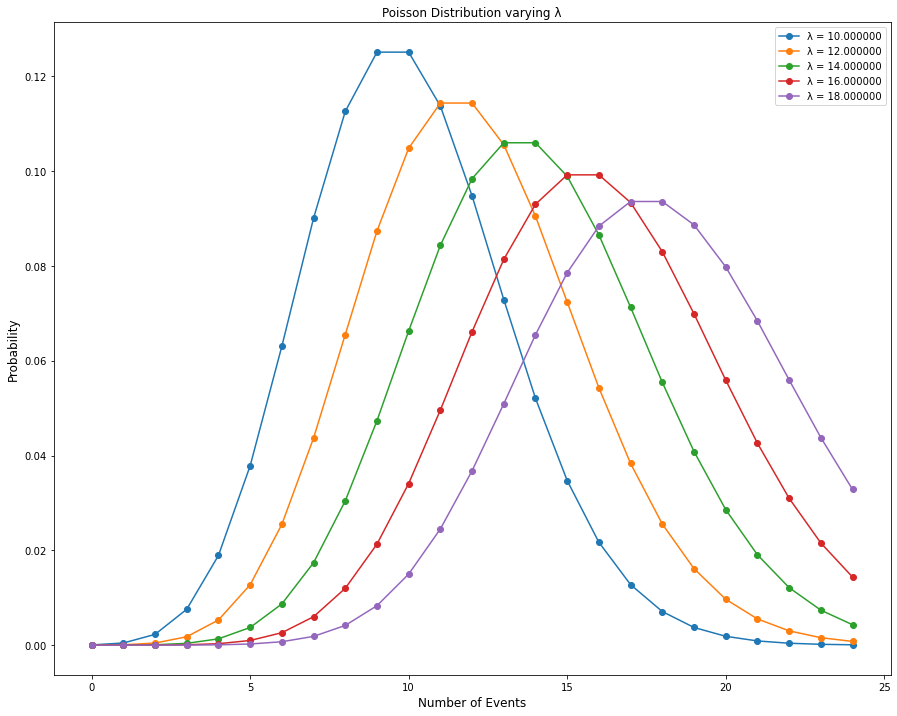

In [91]:
# n = number of songs played within 1 hour, lambd = expected number of songs 
# which can take place in a period
for lambd in range(10, 20, 2):
    n = np.arange(0, 25)
    poisson = stats.poisson.pmf(n, lambd)
    plt.plot(n, poisson, '-o', label="λ = {:f}".format(lambd))
    plt.xlabel('Number of Events', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution varying λ")
    plt.legend()

## Random Playlists

In [92]:
playlist_1 = spotify_data.sample(100,random_state=123)
playlist_2 = spotify_data.sample(100,random_state=12)
playlist_3 = spotify_data.sample(100,random_state=13)
playlist_4 = spotify_data.sample(100,random_state=1233)
playlist_5 = spotify_data.sample(100,random_state=101)

In [93]:
spotify_data.head()

artist_name                track_id  \
0                YG  2RM4jf1Xa9zPgMGRDiht8O   
2             R3HAB  6Wosx2euFPMT14UXiWudMy   
41  Mr Little Jeans  3Z78Hd9B1OndIo7XJajwYR   
42     Orjan Nilsen  16UKw34UY9w40Vc7TOkPpA   
45          Burbank  7AgDITo8BVDoh2bXj2psYA   

                                        track_name  acousticness  \
0   Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj       0.00582   
2                                    Radio Silence       0.02500   
41                                       Forgetter       0.12500   
42                           Nothing Here But Love       0.04480   
45                                   Waiting for U       0.83200   

    danceability  energy  instrumentalness  key  liveness  loudness  ...  \
0          0.743   0.339           0.00000    1    0.0812    -7.678  ...   
2          0.603   0.723           0.00000    9    0.0824    -5.890  ...   
41         0.821   0.512           0.00703    5    0.0879    -7.138  ...   
42         0.574   0.881           0.00000    5    0.0756    -2.150  ...   
45         0.699   0.309           0.17100    4    0.1160   -10.790  ...   

        Mins  Popularity_Category  Loudness_category  Dance_category  \
0   3.972883                  Low             High_L          High_D   
2   2.315217               Medium             High_L        Medium_D   
41  4.235367                  Low             High_L          High_D   
42  3.157783                  Low             High_L        Medium_D   
45  2.800000                  Low             High_L          High_D   

    Energy_category  Valence_category  Popularity_Bayes Valence_Bayes  \
0          Medium_E             Low_V               Low           Low   
2            High_E          Medium_V              High           Low   
41         Medium_E          Medium_V               Low          High   
42           High_E          Medium_V               Low          High   
45            Low_E          Medium_V               Low           Low   

   Dance_Bayes Loudness_Bayes  
0         High           High  
2         High           High  
41        High           High  
42        High           High  
45        High           High  

[5 rows x 26 columns]

In [94]:
spotify_data['freq'] = spotify_data.groupby('Dance_category')['Dance_category'].transform('count')
spotify_data['freq']

0         34559
2         45979
41        34559
42        45979
45        34559
          ...  
130658    45979
130659    45979
130660    34559
130661    34559
130662    34559
Name: freq, Length: 89009, dtype: int64

In [95]:
spotify_data['freq'] = spotify_data.groupby('Dance_category')['Dance_category'].transform('count')
sample_df = spotify_data.sample(weights = spotify_data.freq)

In [96]:
sample_df

artist_name                track_id track_name  acousticness  \
79134  The Magic Gang  6rYZRJK1i4S06Ks15lKtfY    Bruises        0.0777   

       danceability  energy  instrumentalness  key  liveness  loudness  ...  \
79134         0.572   0.702          0.000006    0     0.107    -3.409  ...   

      Popularity_Category  Loudness_category  Dance_category  Energy_category  \
79134              Medium             High_L        Medium_D           High_E   

       Valence_category  Popularity_Bayes  Valence_Bayes Dance_Bayes  \
79134            High_V               Low           High        High   

      Loudness_Bayes   freq  
79134           High  45979  

[1 rows x 27 columns]